In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
dftest = pd.read_csv("test_lAUu6dG.csv")

df = train.copy()
# df = pd.concat([df, dftest])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* Loan_Amount_Term is in numbe of months


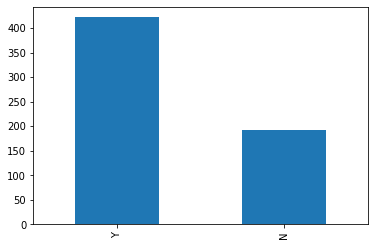

In [3]:
df['Loan_Status'].value_counts().plot.bar()

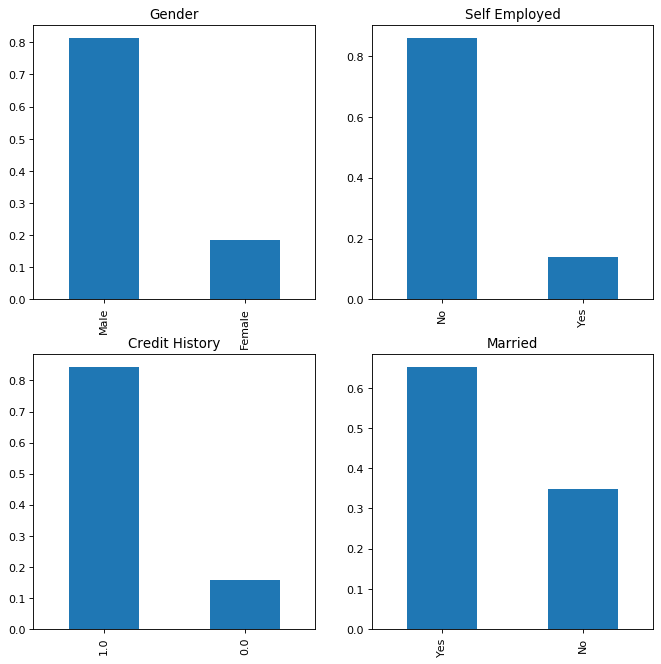

In [4]:
plt.figure(1, figsize = (10,10), dpi = 80)
plt.subplot(221)
df['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')
plt.subplot(222)
df['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(223)
df['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')
plt.subplot(224)
df['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.show()

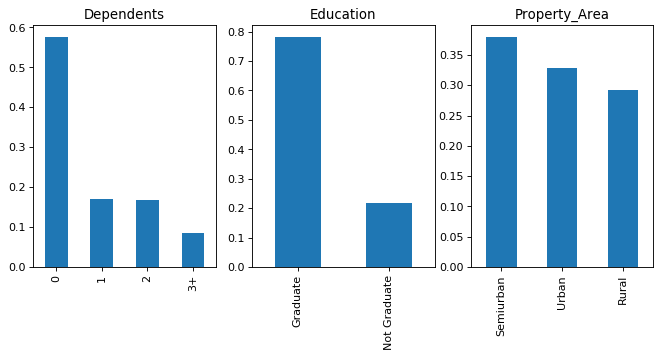

In [5]:
plt.figure(2, figsize = (10,4), dpi = 80)
plt.subplot(131)
df['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')
plt.subplot(132)
df['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
df['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

In [6]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

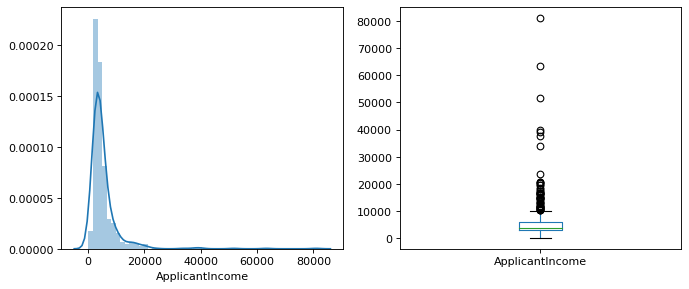

In [7]:
plt.figure(3, figsize=(10, 4), dpi = 80)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(10,4))
plt.show()

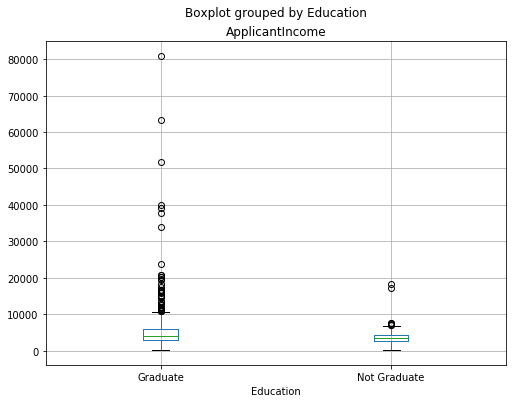

In [8]:
# plt.figure(4, figsize=(8,6))
df.boxplot(column = 'ApplicantIncome', by = 'Education', figsize=(8,6))
# plt.show()

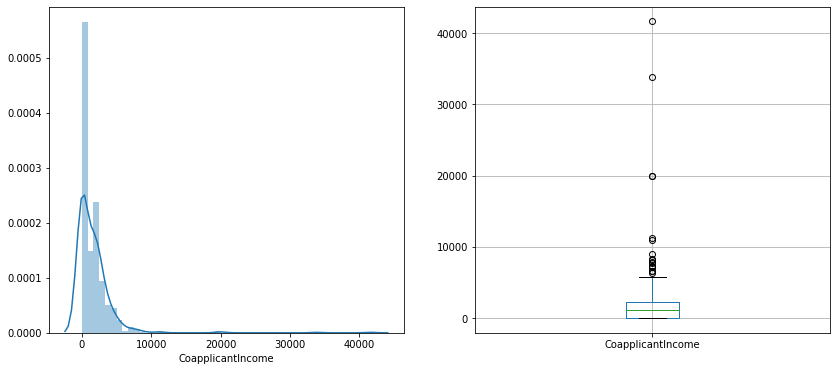

In [9]:
plt.figure(5, figsize=(14,6))
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(122)
df.boxplot(column = 'CoapplicantIncome', figsize=(8,6))

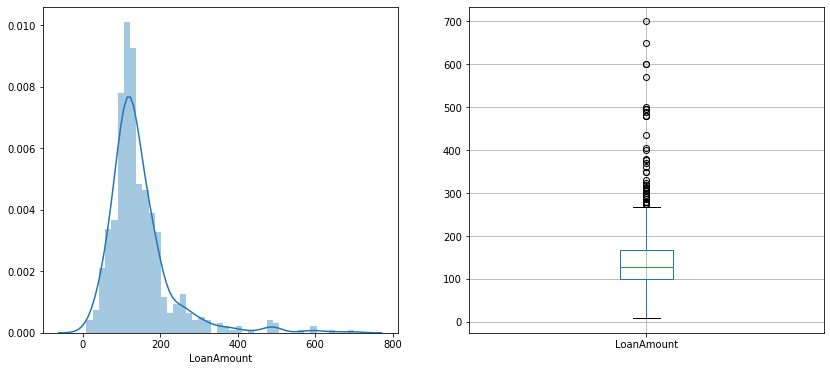

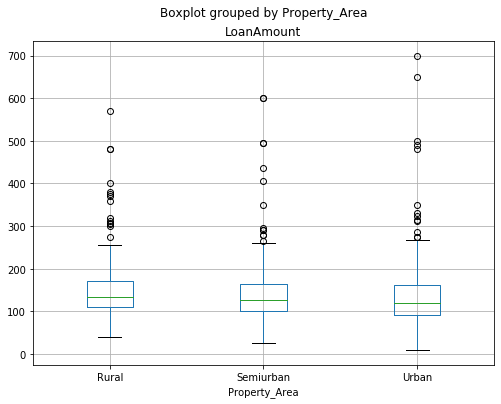

In [13]:
plt.figure(5, figsize=(14,6))
plt.subplot(121)
sns.distplot(df[df['LoanAmount'].notnull()].LoanAmount)
plt.subplot(122)
df.boxplot(column = 'LoanAmount', figsize=(8,6))
df.boxplot(column = 'LoanAmount', by = 'Property_Area', figsize=(8,6))
plt.show()
# df['LoanAmount'].notnull()

Credit_History  0.0  1.0
Property_Area           
Rural            28  137
Semiurban        30  187
Urban            31  151
Property_Area
Rural        165.0
Semiurban    217.0
Urban        182.0
dtype: float64


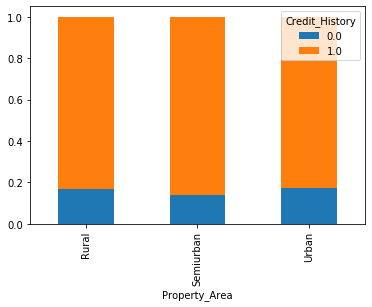

In [14]:
# df.groupby('Property_Area').Credit_History.value_counts(dropna=True).plot(kind="bar", stacked=True)
rse = pd.crosstab(df['Property_Area'], df['Credit_History'])
print(rse)
# rse.div()
print(rse.sum(1).astype(float))

rse.div(rse.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


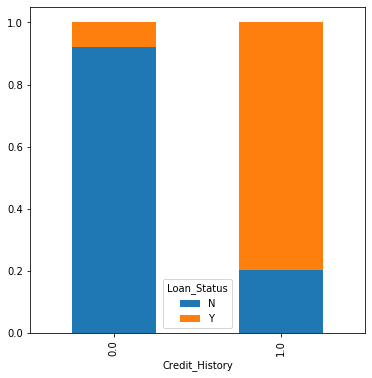

In [15]:
cred = pd.crosstab(df['Credit_History'], df['Loan_Status'])
print(cred)
cred.div(cred.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize=(6,6))

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


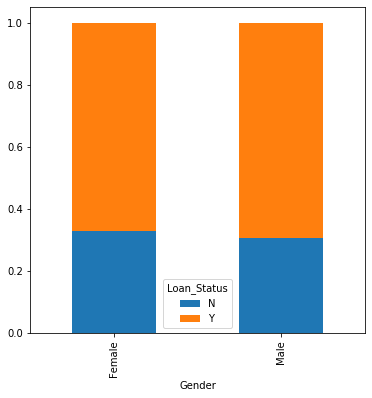

In [16]:
gender = pd.crosstab(df['Gender'], df['Loan_Status'])

print(gender)

gender.div(gender.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize=(6,6)) 

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


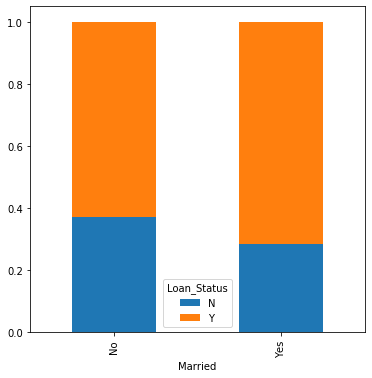

In [17]:
married = pd.crosstab(df['Married'], df['Loan_Status'])
print(married)

married.div(married.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize=(6,6))

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


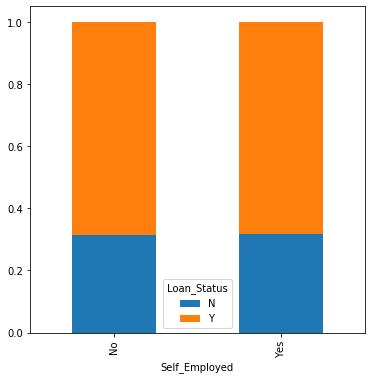

In [18]:
emp_status = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
print(emp_status)
emp_status.div(emp_status.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize=(6,6))

Loan_Status   N    Y
IncomeBin           
0-1000        3    3
1000-2000    13   22
2000-3000    38   98
3000-4000    47  110
4000-5000    32   57
5000-6000    13   41
6000+        46   91


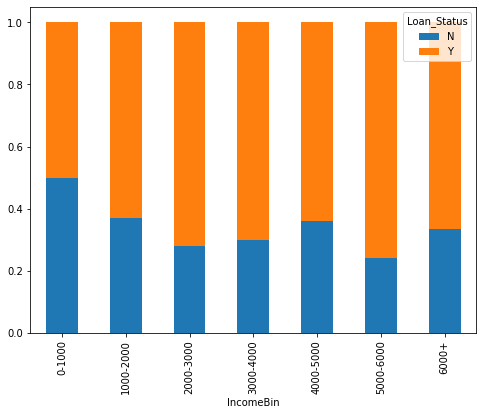

In [19]:
# df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
# df['ApplicantIncome'].min()
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 81000]
labels = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000+']
df['IncomeBin'] = pd.cut(df['ApplicantIncome'], bins, labels = labels)
incbin = pd.crosstab(df['IncomeBin'], df['Loan_Status'])
print(incbin)
incbin.div(incbin.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize= (8,6))

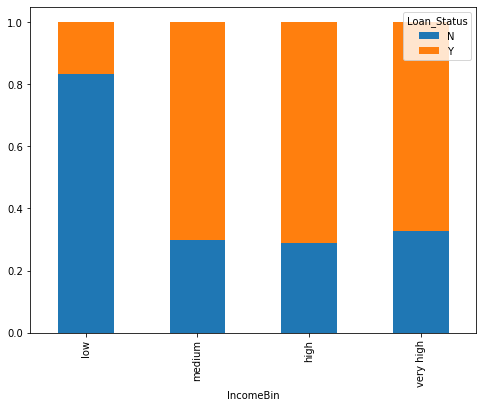

In [20]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
bins = [0, 2000, 4000, 6000, 81000]
labels = ['low', 'medium', 'high', 'very high']
df['IncomeBin'] = pd.cut(df['TotalIncome'], bins, labels = labels)
incbin = pd.crosstab(df['IncomeBin'], df['Loan_Status'])
incbin.div(incbin.sum(axis=1).astype(float), axis=0).plot.bar(stacked=True, figsize=(8,6))

In [ ]:
df = train
#Imputating train set
f1 = df['Property_Area'] == 'Urban'
f2 = df['Property_Area'] == 'Semiurban'
f3 = df['Property_Area'] == 'Rural'
med_urb = df['LoanAmount'][f1].median()
med_semi = df['LoanAmount'][f2].median()
med_rural = df['LoanAmount'][f3].median()

df.loc[(df['Property_Area'] == 'Urban') & (np.isnan(df['LoanAmount'])), 'LoanAmount'] = med_urb
df.loc[(df['Property_Area'] == 'Semiurban') & (np.isnan(df['LoanAmount'])), 'LoanAmount'] = med_semi
df.loc[(df['Property_Area'] == 'Rural') & (np.isnan(df['LoanAmount'])), 'LoanAmount'] = med_rural

f1 = df['Property_Area'] == 'Urban'
f2 = df['Property_Area'] == 'Semiurban'
f3 = df['Property_Area'] == 'Rural'
mode_urb = df['Loan_Amount_Term'][f1].mode().values
mode_semi = df['Loan_Amount_Term'][f2].mode().values
mode_rural = df['Loan_Amount_Term'][f3].mode().values
# print(avg_urb, avg_semi, avg_rural)
df.loc[(df['Property_Area'] == 'Urban') & (np.isnan(df['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_urb
df.loc[(df['Property_Area'] == 'Semiurban') & (np.isnan(df['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_semi
df.loc[(df['Property_Area'] == 'Rural') & (np.isnan(df['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_rural

df['Credit_History'] = df['Credit_History'].fillna(np.squeeze(df['Credit_History'].mode().values))
df['Dependents'] = df['Dependents'].fillna(np.squeeze(df['Dependents'].mode().values))
df['Married'] = df['Married'].fillna(np.squeeze(df['Married'].mode().values))
df['Gender'] = df['Gender'].fillna(np.squeeze(df['Gender'].mode().values))
df['Self_Employed'] = df['Self_Employed'].fillna(np.squeeze(df['Self_Employed'].mode().values))

#Imputating test set

dftest.loc[(dftest['Property_Area'] == 'Urban') & (np.isnan(dftest['LoanAmount'])), 'LoanAmount'] = med_urb
dftest.loc[(dftest['Property_Area'] == 'Semiurban') & (np.isnan(dftest['LoanAmount'])), 'LoanAmount'] = med_semi
dftest.loc[(dftest['Property_Area'] == 'Rural') & (np.isnan(dftest['LoanAmount'])), 'LoanAmount'] = med_rural

dftest.loc[(dftest['Property_Area'] == 'Urban') & (np.isnan(dftest['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_urb
dftest.loc[(dftest['Property_Area'] == 'Semiurban') & (np.isnan(dftest['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_semi
dftest.loc[(dftest['Property_Area'] == 'Rural') & (np.isnan(dftest['Loan_Amount_Term'])), 'Loan_Amount_Term'] = mode_rural

dftest['Credit_History'] = dftest['Credit_History'].fillna(np.squeeze(df['Credit_History'].mode().values))
dftest['Dependents'] = dftest['Dependents'].fillna(np.squeeze(df['Dependents'].mode().values))
dftest['Married'] = dftest['Married'].fillna(np.squeeze(df['Married'].mode().values))
dftest['Gender'] = dftest['Gender'].fillna(np.squeeze(df['Gender'].mode().values))
dftest['Self_Employed'] = dftest['Self_Employed'].fillna(np.squeeze(df['Self_Employed'].mode().values))

df.head()

In [ ]:
# df['LoanAmount'].unique()
# df['Married'].unique()
# df['Credit_History'].unique()
# np.max(df['ApplicantIncome'].unique())
# df['Education'].unique()
# df['Dependents'].unique()
# df['Education'].unique()
# df['']
# df['LoanAmount'].isna().sum()

print("Number of NaN entries:")
print('LoanAmount', df['LoanAmount'].isna().sum())
print('Married', df['Married'].isna().sum())
print('Credit_History', df['Credit_History'].isna().sum())
print('Education', df['Education'].isna().sum())
print('Dependents', df['Dependents'].isna().sum())
print('Gender', df['Gender'].isna().sum())
print('Loan_Amount_Term', df['Loan_Amount_Term'].isna().sum())
print('CoapplicantIncome', df['CoapplicantIncome'].isna().sum())
print('ApplicantIncome', df['ApplicantIncome'].isna().sum())
print('Loan_Status', df['Loan_Status'].isna().sum())
print('Property_Area', df['Property_Area'].isna().sum())
print('Self_Employed', df['Self_Employed'].isna().sum())

print("Number of NaN entries in test set")
print("Number of NaN entries:")
print('LoanAmount', dftest['LoanAmount'].isna().sum())
print('Married', dftest['Married'].isna().sum())
print('Credit_History', dftest['Credit_History'].isna().sum())
print('Education', dftest['Education'].isna().sum())
print('Dependents', dftest['Dependents'].isna().sum())
print('Gender', dftest['Gender'].isna().sum())
print('Loan_Amount_Term', dftest['Loan_Amount_Term'].isna().sum())
print('CoapplicantIncome', dftest['CoapplicantIncome'].isna().sum())
print('ApplicantIncome', dftest['ApplicantIncome'].isna().sum())
print('Property_Area', dftest['Property_Area'].isna().sum())
print('Self_Employed', dftest['Self_Employed'].isna().sum())

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from itertools import chain

oe = OrdinalEncoder()
x1 = oe.fit_transform(df.Gender.values.reshape(-1,1))
x1 = list(chain(*x1))
x2 = list(chain(*oe.fit_transform(df.Married.values.reshape(-1,1))))
x3 = list(chain(*oe.fit_transform(df.Dependents.values.reshape(-1,1))))
x4 = list(chain(*oe.fit_transform(df.Education.values.reshape(-1,1))))
x5 = list(chain(*oe.fit_transform(df.Self_Employed.values.reshape(-1,1))))

scaler = MinMaxScaler(feature_range = (0,1))
x6 = list(chain(*scaler.fit_transform(pd.concat([df['ApplicantIncome'], dftest['ApplicantIncome']]).values.reshape(-1, 1))))
x7 = list(chain(*scaler.fit_transform(pd.concat([df['CoapplicantIncome'],dftest['CoapplicantIncome']]).values.reshape(-1, 1))))
x8 = list(chain(*scaler.fit_transform(pd.concat([df['LoanAmount'], dftest['LoanAmount']]).values.reshape(-1, 1))))
x9 = list(chain(*scaler.fit_transform(pd.concat([df['Loan_Amount_Term'], dftest['Loan_Amount_Term']]).values.reshape(-1, 1))))

x10 = list(chain(*oe.fit_transform(df.Credit_History.values.reshape(-1,1))))
x11 = list(chain(*oe.fit_transform(df.Property_Area.values.reshape(-1,1))))

df['Gender'] = x1
df['Married'] = x2
df['Dependents'] = x3
df['Education'] = x4
df['Self_Employed'] = x5
df['ApplicantIncome'] = x6[0:614]
df['CoapplicantIncome'] = x7[0:614]
df['LoanAmount'] = x8[0:614]
df['Loan_Amount_Term'] = x9[0:614]
df['Credit_History'] = x10
df['Property_Area'] = x11

dftest['Gender'] = list(chain(*oe.fit_transform(dftest.Gender.values.reshape(-1,1))))
dftest['Married'] = list(chain(*oe.fit_transform(dftest.Married.values.reshape(-1,1))))
dftest['Dependents'] = list(chain(*oe.fit_transform(dftest.Dependents.values.reshape(-1,1))))
dftest['Education'] = list(chain(*oe.fit_transform(dftest.Education.values.reshape(-1,1))))
dftest['Self_Employed'] = list(chain(*oe.fit_transform(dftest.Self_Employed.values.reshape(-1,1))))
dftest['ApplicantIncome'] = x6[614:]
dftest['CoapplicantIncome'] = x7[614:]
dftest['LoanAmount'] = x8[614:]
dftest['Loan_Amount_Term'] = x9[614:]
dftest['Credit_History'] = list(chain(*oe.fit_transform(dftest.Credit_History.values.reshape(-1,1))))
dftest['Property_Area'] = list(chain(*oe.fit_transform(dftest.Property_Area.values.reshape(-1,1))))

# dftest.head()

le = LabelEncoder()
y = le.fit_transform(df.Loan_Status.values)
df['Loan_Status'] = y
# print(x2)

In [ ]:
df.head()

In [ ]:
sc_train = df[['Gender', 'Married', 'Dependents', 'Education', 
               'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
train_labels = df['Loan_Status'].values
sc_test = dftest[['Gender', 'Married', 'Dependents', 'Education', 
              'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
              'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

Using TensorFlow backend.
C:\Users\tashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tashi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [ ]:
model = Sequential([
    Dense(units = 2, input_shape = (11, ), activation = 'softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = sparse_categorical_crossentropy, metrics = ['accuracy'])

In [ ]:
model.fit(x = sc_train, y = y, 
          batch_size = 10, 
          epochs = 100, 
          validation_split = 0.1, 
          shuffle = True, 
          verbose = 2
         )

In [ ]:
predictions = model.predict(x = sc_test, batch_size=10, verbose=0)
print(predictions)

In [ ]:
r_pred = np.argmax(predictions, axis=1)
print(r_pred)

In [ ]:
# type(r_pred)
r_pred = list(r_pred)
for i in range(len(r_pred)):
    if r_pred[i] == 0:
        r_pred[i] = 'N'
    else:
        r_pred[i] = 'Y'

pred = pd.DataFrame({'Loan_ID' : dftest['Loan_ID'].values, 'Loan_Status' : r_pred})
pred.head()

# len(r_pred)

In [ ]:
pred.to_csv('loan_pred.csv', index=False)